In [388]:
import pandas as pd
import os
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import PyQt5
from ete3 import Tree, TreeStyle, NodeStyle, faces, AttrFace
from Bio import SeqIO
import re
from Bio import Phylo
from io import StringIO
from bisect import bisect_left
import numpy as np
from collections import Counter
tqdm.pandas()

In [2]:
save_dir = "/net/seq/data2/projects/aabisheva/DHS_evolution/Jupyther_notebooks/Data_from_notebook/"
plots_dir = "/net/seq/data2/projects/aabisheva/DHS_evolution/Jupyther_notebooks/Plots/04_25_index/"

   ## Processing bnmapper outputs

In [3]:
PATH_TO_INDEX = "/net/seq/data2/projects/sabramov/SuperIndex/dnase-index0415/matrices/full/output/annotations/masterlist_DHSs_Altius.filtered.annotated.bed"

In [4]:
index = pd.read_csv(PATH_TO_INDEX, sep='\t')
num_rows_index, num_columns_index = index.shape
index

,#chr,start,end,dhs_id,total_signal,num_samples,num_peaks,dhs_width,dhs_summit,core_start,...,spot1_std,spot1_min,spot1_mean,spot1_median,spot1_max,spot1_Q1,spot1_Q3,n_gc,percent_gc,n_mappable
0,chr1,794480,794640,chunk0006_92_1,0.443505,2,2,160,794560,794550.0,...,0.056700,0.5502,0.606900,0.60690,0.6636,0.578550,0.635250,84,0.525000,160
1,chr1,795020,795155,chunk0006_95_1,50.264423,77,77,135,795090,795030.0,...,0.129551,0.3288,0.565580,0.58530,0.7674,0.447200,0.677500,55,0.407407,135
2,chr1,796175,796240,chunk0006_96_1,0.297804,2,2,65,796176,796176.0,...,0.037350,0.4771,0.514450,0.51445,0.5518,0.495775,0.533125,14,0.215385,65
3,chr1,802368,802529,chunk0006_97_1,1.218390,5,5,161,802470,802432.0,...,0.047702,0.4051,0.492860,0.50730,0.5494,0.493200,0.509300,85,0.527950,161
4,chr1,804885,805000,chunk0006_98_2,105.790392,150,150,115,804930,804910.0,...,0.117165,0.2805,0.528041,0.51460,0.8243,0.448650,0.605400,61,0.530435,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4568311,chrY,26580680,26580804,chunk2423_26_2,2.598796,27,27,124,26580750,26580730.0,...,0.084071,0.3277,0.435663,0.40725,0.6389,0.374325,0.491325,67,0.540323,124
4568312,chrY,26586760,26586900,chunk2423_29_1,0.884144,7,7,140,26586830,26586830.0,...,0.105010,0.2715,0.401371,0.38590,0.5471,0.303850,0.498700,63,0.450000,140
4568313,chrY,26590017,26590180,chunk2423_33_1,3.204600,9,9,163,26590090,26590070.0,...,0.107908,0.4088,0.567543,0.56990,0.7166,0.479200,0.659550,97,0.595092,163
4568314,chrY,26613420,26613600,chunk2423_42_1,0.611615,3,3,180,26613510,26613510.0,...,0.055629,0.4287,0.486467,0.46910,0.5616,0.448900,0.515350,79,0.438889,180


In [7]:
# Cactus447way mapping files, based on chain files
directory = '/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_bnmapper_april_index/'

files = sorted([f for f in os.listdir(directory) if f.endswith("_swapped_mapped.txt")])

# Iterate through each file in the directory using tqdm for the progress bar
for filename in tqdm(files, desc="Processing files"):
    specie_name = filename.split('-to-')[1].split('_swapped_mapped.txt')[0]
    
    # Read the 4th column of the file to get the list of DHSs
    file_path = os.path.join(directory, filename)
    dhs_present = pd.read_csv(file_path, sep='\t', header=None, usecols=[3])
    dhs_present_list = dhs_present[3].unique().tolist()
    index[specie_name] = 0
    index.loc[index['dhs_id'].isin(dhs_present_list), specie_name] = 1

Processing files:  22%|██████████████████▋                                                                   | 97/446 [14:17<49:02,  8.43s/it]/tmp/ipykernel_27773/1018169118.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  index[specie_name] = 0
Processing files:  22%|██████████████████▉                                                                   | 98/446 [14:25<47:37,  8.21s/it]/tmp/ipykernel_27773/1018169118.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  index[specie_name] = 0
Processing files:  22%|███████████

In [8]:
index

,#chr,start,end,dhs_id,total_signal,num_samples,num_peaks,dhs_width,dhs_summit,core_start,...,Uropsilus_gracilis,Ursus_maritimus,Varecia_rubra,Varecia_variegata,Vicugna_pacos,Vulpes_lagopus,Xerus_inauris,Zalophus_californianus,Zapus_hudsonius,Ziphius_cavirostris
0,chr1,794480,794640,chunk0006_92_1,0.443505,2,2,160,794560,794550.0,...,0,0,0,0,0,0,0,0,0,0
1,chr1,795020,795155,chunk0006_95_1,50.264423,77,77,135,795090,795030.0,...,0,0,0,0,0,0,0,0,0,0
2,chr1,796175,796240,chunk0006_96_1,0.297804,2,2,65,796176,796176.0,...,0,0,0,0,0,0,0,0,0,0
3,chr1,802368,802529,chunk0006_97_1,1.218390,5,5,161,802470,802432.0,...,0,0,0,0,0,0,0,0,0,0
4,chr1,804885,805000,chunk0006_98_2,105.790392,150,150,115,804930,804910.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4568311,chrY,26580680,26580804,chunk2423_26_2,2.598796,27,27,124,26580750,26580730.0,...,0,0,0,0,0,0,0,0,0,0
4568312,chrY,26586760,26586900,chunk2423_29_1,0.884144,7,7,140,26586830,26586830.0,...,0,0,0,0,0,0,0,0,0,0
4568313,chrY,26590017,26590180,chunk2423_33_1,3.204600,9,9,163,26590090,26590070.0,...,1,0,0,0,0,0,0,1,1,0
4568314,chrY,26613420,26613600,chunk2423_42_1,0.611615,3,3,180,26613510,26613510.0,...,0,0,0,0,0,1,1,0,0,0


In [9]:
index.to_csv(save_dir + 'index_all_species_2604.csv', index=False) 

In [256]:
save_dir + 'index_all_species_2604.csv'

'/net/seq/data2/projects/aabisheva/DHS_evolution/Jupyther_notebooks/Data_from_notebook/index_all_species_2604.csv'

In [73]:
# Saving calculated data, cactus447way based on chains
species_totals = {}
for specie in index.columns[num_columns_index:]:
    species_totals[specie] = index[specie].sum()
species_totals = {k: int(v) for k, v in species_totals.items()}
species_totals["hg38"] = num_rows_index
# Save the dictionary as a JSON file
json_filename = save_dir + 'species_dhs_totals_april_index.json'
with open(json_filename, 'w') as json_file:
    json.dump(species_totals, json_file, indent=4)
print(f"Totals saved to {json_filename}")

Totals saved to /net/seq/data2/projects/aabisheva/DHS_evolution/Jupyther_notebooks/Data_from_notebook/species_dhs_totals_april_index.json


## Loading

In [ ]:
# index, with calculated occurrences of each DHS
csv_file_path = save_dir + 'index_all_species_2604.csv'
index = pd.read_csv(csv_file_path)

In [74]:
with open(save_dir + 'species_dhs_totals_april_index.json', 'r') as f:
    species_dhs_counts = json.load(f)

## Plot

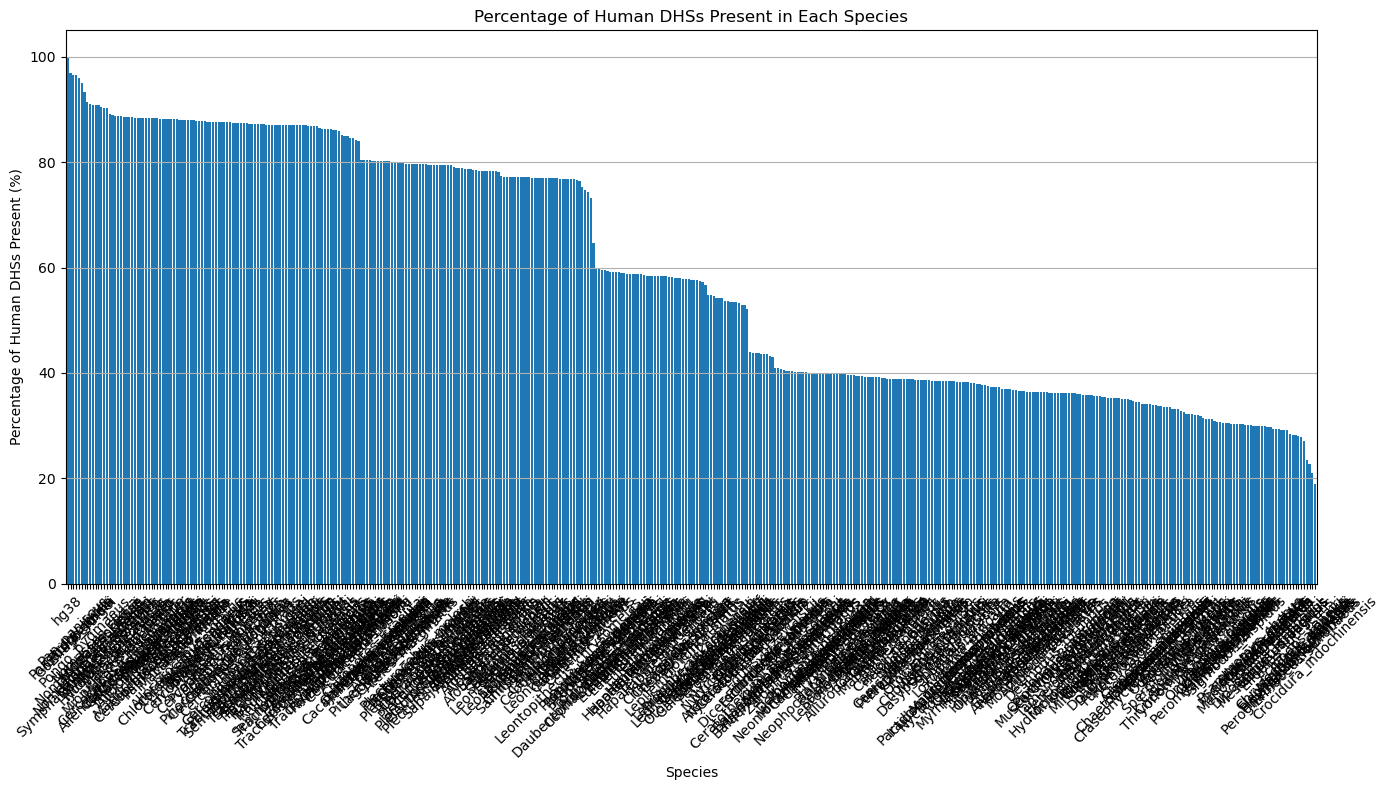

In [75]:
# Assuming `index` is already loaded and represents the human DHS data
total_human_dhs = index['dhs_id'].nunique()

# Convert counts to percentages
species_dhs_percentages = {species: (count / total_human_dhs) * 100 for species, count in species_dhs_counts.items()}

# Create a Series from the dictionary for easy sorting and plotting
species_dhs_percentages_series = pd.Series(species_dhs_percentages).sort_values(ascending=False)

# Plot the sorted data
plt.figure(figsize=(14, 8))
species_dhs_percentages_series.plot(kind='bar', width=0.8)
plt.ylabel("Percentage of Human DHSs Present (%)")
plt.xlabel("Species")
plt.title("Percentage of Human DHSs Present in Each Species")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.savefig(plots_dir + "Percentage_of_Human_DHSs_Present_in_Each_Species_quantify.pdf")
plt.show()

## Loading common names

In [87]:
# Load the tree from the file
with open('/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_hal/cactus447way_tree.txt', 'r') as f:
#with open('/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/multiz100way_hal/muliz100way_phylogenetic_tree.txt', 'r') as f:
    newick_string = f.read().strip()
    
t = Tree(newick_string, format=1)

# Retrieve the node corresponding to Homo sapiens
human_node = t.search_nodes(name="hg38")[0]

# Calculate the distance of each species to Homo sapiens
species_distances = {}
for leaf in t.iter_leaves():
    distance = leaf.get_distance(human_node)
    species_distances[leaf.name] = distance
    
# manually remove discrepancies between the lists of species from HAL file and the list of species from this tree:
# {'Hylobates_lar', 'Hylobates_pileatus'} = {'Hylobates_pileatus_a', 'Hylobates_pileatus_b'}
species_distances['Hylobates_pileatus_a'] = species_distances['Hylobates_lar']
species_distances['Hylobates_pileatus_b'] = species_distances['Hylobates_pileatus']
species_distances.pop('Hylobates_lar', None)
species_distances.pop('Hylobates_pileatus', None)

# Now you can sort your species based on this distance for plotting
sorted_species_by_distance = sorted(species_distances, key=species_distances.get)
#sorted_species_by_distance

In [88]:
def time_to_mcra(tree, species1, species2):
    # Find the MRCA node for the two species
    mcra_node = tree.get_common_ancestor(species1, species2)
    
    # Calculate the distance (time) from species1 to the MCRA
    time_species1 = species1.get_distance(mcra_node, topology_only=False)
    
    # Calculate the distance (time) from species2 to the MCRA
    time_species2 = species2.get_distance(mcra_node, topology_only=False)
    
    # Return the sum of the two times
    return time_species1 + time_species2

# Example: Time to MCRA for Homo sapiens and Pan troglodytes
homo_sapiens_node = t.search_nodes(name="hg38")[0]
pan_troglodytes_node = t.search_nodes(name="Acomys_cahirinus")[0]

time_since_mcra = time_to_mcra(t, homo_sapiens_node, pan_troglodytes_node)
print(f"Time since MCRA for Homo sapiens and Acomys_cahirinus: {time_since_mcra} -- superstition units")

Time since MCRA for Homo sapiens and Acomys_cahirinus: 0.51414806 -- superstition units


In [107]:
# Code to map short names of species with common names

#short names
#with open('/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/multiz100way_hal/muliz100way_phylogenetic_tree.txt', 'r') as f:
with open('/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_hal/cactus447way_tree.txt', 'r') as f:
    short_names_newick = f.read().strip()
#common names
#with open('/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/multiz100way_hal/multiz100way_phylogenetic_tree_common_names.txt', 'r') as f:
with open('/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_hal/cactus447way_tree_common_names.txt', 'r') as f:
    common_names_newick = f.read().strip()

# Parse the Newick strings into ETE tree objects
short_names_tree = Tree(short_names_newick, format=1)
common_names_tree = Tree(common_names_newick, format=1)

# Retrieve the node corresponding to Homo sapiens in both trees
human_node_short = short_names_tree.search_nodes(name="hg38")[0]
human_node_common = common_names_tree.search_nodes(name="human")[0]

# Calculate the distance of each species to Homo sapiens in both trees
short_names_distances = {leaf.name: leaf.get_distance(human_node_short) for leaf in short_names_tree.iter_leaves()}
common_names_distances = {leaf.name: leaf.get_distance(human_node_common) for leaf in common_names_tree.iter_leaves()}

# Create a mapping based on distances
name_mapping = {}
for short_name, distance in short_names_distances.items():
    # Find the common name with the same distance
    common_name = next((name for name, dist in common_names_distances.items() if dist == distance), None)
    if common_name:
        name_mapping[short_name] = common_name

# Now you have a mapping of short names to common names
print(name_mapping)

{'hg38': 'human', 'Pan_paniscus': 'bonobo', 'Pan_troglodytes': 'chimpanzee', 'Gorilla_gorilla': 'western_gorilla', 'Gorilla_beringei': 'Eastern_Gorilla', 'Pongo_abelii': 'Sumatran_orangutan', 'Pongo_pygmaeus': 'Bornean_orangutan', 'Hylobates_pileatus': 'pileated_gibbon', 'Hylobates_abbotti': 'Western_gray_gibbon', 'Hylobates_muelleri': 'Southern_gray_gibbon', 'Hylobates_agilis': 'agile_gibbon', 'Hylobates_klossii': "Kloss's_gibbon", 'Hoolock_leuconedys': 'Eastern_hoolock_gibbon', 'Nomascus_siki_a': 'southern_white-cheeked_crested_gibbon', 'Nomascus_gabriellae': 'Southern_yellow-cheeked_crested_gibbon', 'Nomascus_annamensis': 'Northern_yellow-cheeked_crested_gibbon', 'Nomascus_concolor': 'Western_black_crested_gibbon', 'Symphalangus_syndactylus': 'siamang', 'Papio_anubis': 'olive_baboon', 'Papio_papio': 'Guinea_Baboon', 'Papio_hamadryas': 'hamadryas_baboon', 'Papio_ursinus': 'Chacma_Baboon', 'Papio_kindae': 'Kinda_Baboon', 'Papio_cynocephalus': 'Yellow_Baboon', 'Lophocebus_aterrimus': '

In [108]:
name_mapping['Nomascus_siki_b'] = 'southern_white-cheeked_crested_gibbon_b'
name_mapping['Pygathrix_nigripes_b'] = 'black-shanked_douc_b'
name_mapping['Ateles_geoffroyi_b'] = 'Central_American_spider_monkey_b'
name_mapping['Hylobates_pileatus_a'] = name_mapping['Hylobates_pileatus']
name_mapping['Hylobates_pileatus_b'] = name_mapping['Hylobates_pileatus']
name_mapping.pop('Hylobates_lar', None)
name_mapping.pop('Hylobates_pileatus', None)
len(name_mapping)

447

# Plot

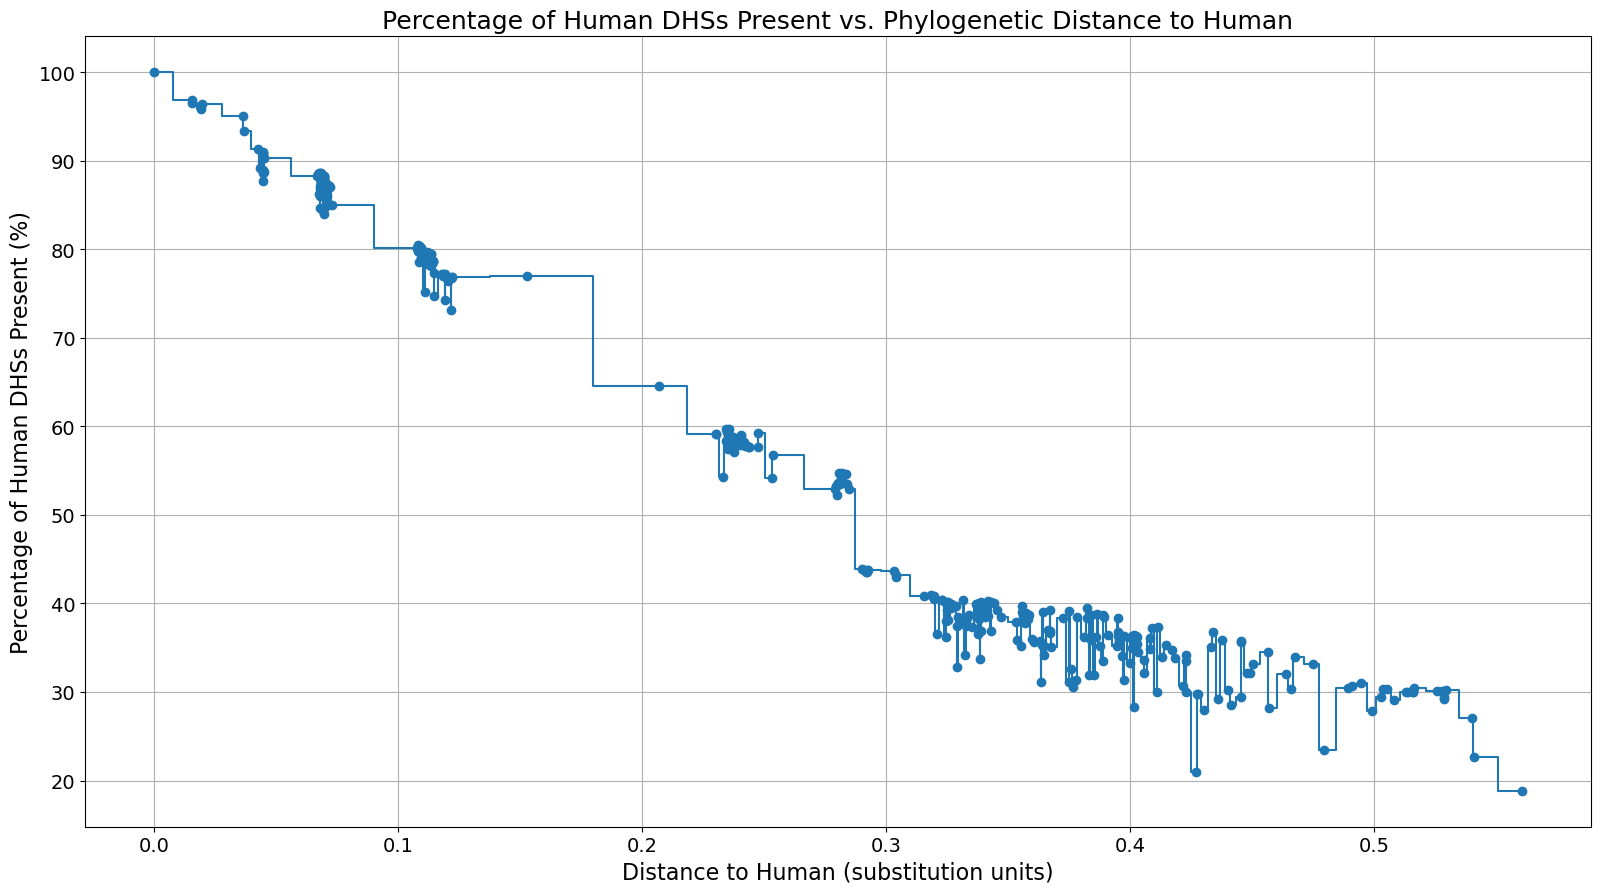

In [113]:
formatted_species_by_distance = [species.replace(' ', '_') for species in sorted_species_by_distance]

# Filter the DHS counts to only include the species we have distances for
filtered_dhs_counts = {species: species_dhs_counts[species] for species in formatted_species_by_distance if species in species_dhs_counts}
# now we have all

# Create lists for plotting
species_names = list(filtered_dhs_counts.keys())
dhs_counts = [filtered_dhs_counts[species] for species in species_names]
distances_to_human = [species_distances[species] for species in species_names]

# Create a dataframe for easier plotting
plotting_data = pd.DataFrame({
    'Species': species_names,
    'DHS Counts': dhs_counts,
    'Distance to Human': distances_to_human
})

# Sort the dataframe by distance to human
plotting_data_sorted = plotting_data.sort_values(by='Distance to Human')

# unncessary
max_dhs_count = max(species_dhs_counts.values())
dhs_percentages = [count / max_dhs_count * 100 for count in dhs_counts]

# Create a new dataframe for plotting
plotting_data_line = pd.DataFrame({
    'Species': species_names,
    'DHS Percentage': dhs_percentages,
    'Distance to Human': distances_to_human
})

# Sort the dataframe by distance to human
plotting_data_line_sorted = plotting_data_line.sort_values(by='Distance to Human')

# Create the line plot
plt.figure(figsize=(16, 9))
plt.plot(plotting_data_line_sorted['Distance to Human'], plotting_data_line_sorted['DHS Percentage'], marker='o', linestyle='-', drawstyle='steps-mid')
plt.ylabel("Percentage of Human DHSs Present (%)", fontsize=16)
plt.xlabel("Distance to Human (substitution units)", fontsize=16)
plt.title("Percentage of Human DHSs Present vs. Phylogenetic Distance to Human", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# If you have a directory to save the plot, uncomment the following line
# plt.savefig('/your_directory/Percentage_Human_DHSs_vs_Phylogenetic_Distance.pdf')
plt.show()


### some calculations for YMCRA

In [10]:
# just checking if my and Jeff's specie lists are the same

def read_species(file_path):
    """Read species from a given file."""
    with open(file_path, 'r') as file:
        species = set(file.read().splitlines())
    return species

def compare_species(file1, file2):
    """Compare species between two files and find unique species in each."""
    species1 = read_species(file1)
    species2 = read_species(file2)

    # Find unique species in each file
    unique_to_file1 = species1 - species2
    unique_to_file2 = species2 - species1

    return unique_to_file1, unique_to_file2

# File paths
file1 = "/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_hal/447_mammalian_species_list.txt"
file2 = "/net/seq/data2/projects/jvierstra/annotations/cactus477way/genomes.txt"

# Compare species
unique_to_file1, unique_to_file2 = compare_species(file1, file2)

print("Unique species to file 1:")
for species in unique_to_file1:
    print(species)

print("\nUnique species to file 2:")
for species in unique_to_file2:
    print(species)

Unique species to file 1:

Unique species to file 2:


so files are the same

In [29]:
def load_species_data(file_path):
    """Load species and their precomputed median values into a dictionary."""
    species_median_dict = {}
    with open(file_path, 'r') as file:
        # Skip the header line
        next(file)
        # Iterate over each line in the file
        for line in file:
            # Split line by comma
            parts = line.strip().split(',')
            if len(parts) >= 2:  # Ensure there are at least two elements to avoid errors
                species = parts[0]
                median = float(parts[1])  # Convert the median value to float
                species_median_dict[species] = median
    return species_median_dict

file_path = "/net/seq/data2/projects/jvierstra/annotations/cactus477way/hg38.mya.txt"
species_medians = load_species_data(file_path)
species_medians["hg38"] = 0  # add hg38

print(species_medians)

{'Pantholops_hodgsonii': 94.0, 'Saiga_tatarica': 94.0, 'Okapia_johnstoni': 94.0, 'Macaca_leonina': 28.82, 'Solenodon_paradoxus': 94.0, 'Giraffa_tippelskirchi': 94.0, 'Macaca_silenus': 28.82, 'Antilocapra_americana': 94.0, 'Macaca_siberu': 28.82, 'Erinaceus_europaeus': 94.0, 'Crocidura_indochinensis': 94.0, 'Macaca_nigra': 28.82, 'Sorex_araneus': 94.0, 'Macaca_maura': 28.82, 'Uropsilus_gracilis': 94.0, 'Catagonus_wagneri': 94.0, 'Condylura_cristata': 94.0, 'Scalopus_aquaticus': 94.0, 'Megaderma_lyra': 94.0, 'Craseonycteris_thonglongyai': 94.0, 'Cryptoprocta_ferox': 94.0, 'Hipposideros_armiger': 94.0, 'Mungos_mungo': 94.0, 'Hipposideros_galeritus': 94.0, 'Suricata_suricatta': 94.0, 'Rhinolophus_sinicus': 94.0, 'Helogale_parvula': 94.0, 'Hyaena_hyaena': 94.0, 'Macroglossus_sobrinus': 94.0, 'Paradoxurus_hermaphroditus': 94.0, 'Eidolon_helvum': 94.0, 'Panthera_tigris': 94.0, 'Pteropus_vampyrus': 94.0, 'Panthera_pardus': 94.0, 'Pteropus_alecto': 94.0, 'Panthera_onca': 94.0, 'Rousettus_aegypt

In [149]:
plotting_data['Distance to Human (MY)'] = plotting_data['Species'].map(species_medians)
plotting_data

,Species,DHS Counts,Distance to Human,Distance to Human (MY)
0,hg38,4568316,0.000000,0.0000
1,Pan_troglodytes,4423681,0.015643,8.6000
2,Pan_paniscus,4411837,0.015832,8.6000
3,Gorilla_gorilla,4380362,0.019520,8.6000
4,Gorilla_beringei,4406421,0.019625,8.6000
...,...,...,...,...
442,Mus_musculus,1344134,0.528746,87.2000
443,Mus_spretus,1381698,0.529526,87.2000
444,Microgale_talazaci,1237482,0.540276,99.1887
445,Sorex_araneus,1035185,0.541216,94.0000


## Plot where I group all species with the same distance to Human in MY

In [132]:
# load the same index dataframe as numpy for faster processing
file_path = save_dir + 'index_all_species_2604.csv'
data = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=range(num_columns_index, len(index.columns)), dtype=int)

In [168]:
species_list = list(index.columns[num_columns_index:])  

# Group species indices by their distance to human MY
specie_groups = {}
for idx, specie in enumerate(species_list):
    median_value = species_medians[specie]
    if median_value not in specie_groups:
        specie_groups[median_value] = []
    specie_groups[median_value].append(idx)

aggregated_data = np.zeros((data.shape[0], len(specie_groups)))

# For each group, calculate the maximum across the columns for each row
for group_index, (key, indices) in enumerate(specie_groups.items()):
    # Taking the maximum across the specified columns for each row
    aggregated_data[:, group_index] = data[:, indices].max(axis=1)

print(aggregated_data)

[[1. 0. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 1.]]


In [171]:
column_sums = aggregated_data.sum(axis=0)

sums_by_group = {}

# Loop over the groups and their indices, using the same enumeration order used for filling aggregated_data
for group_index, (key, indices) in enumerate(specie_groups.items()):
    # Assign the sum of the column associated with the current group to the dictionary
    sums_by_group[key] = column_sums[group_index]

sums_by_group[0] = total_human_dhs
    
print(sums_by_group)


{94.0: 3236451.0, 87.2: 3398854.0, 28.82: 4356740.0, 42.9: 4056604.0, 73.75492: 3483608.0, 68.6: 2983556.0, 99.1887: 2970737.0, 8.6: 4531404.0, 19.45714: 4358200.0, 15.2: 4401867.0, 0: 4568316}


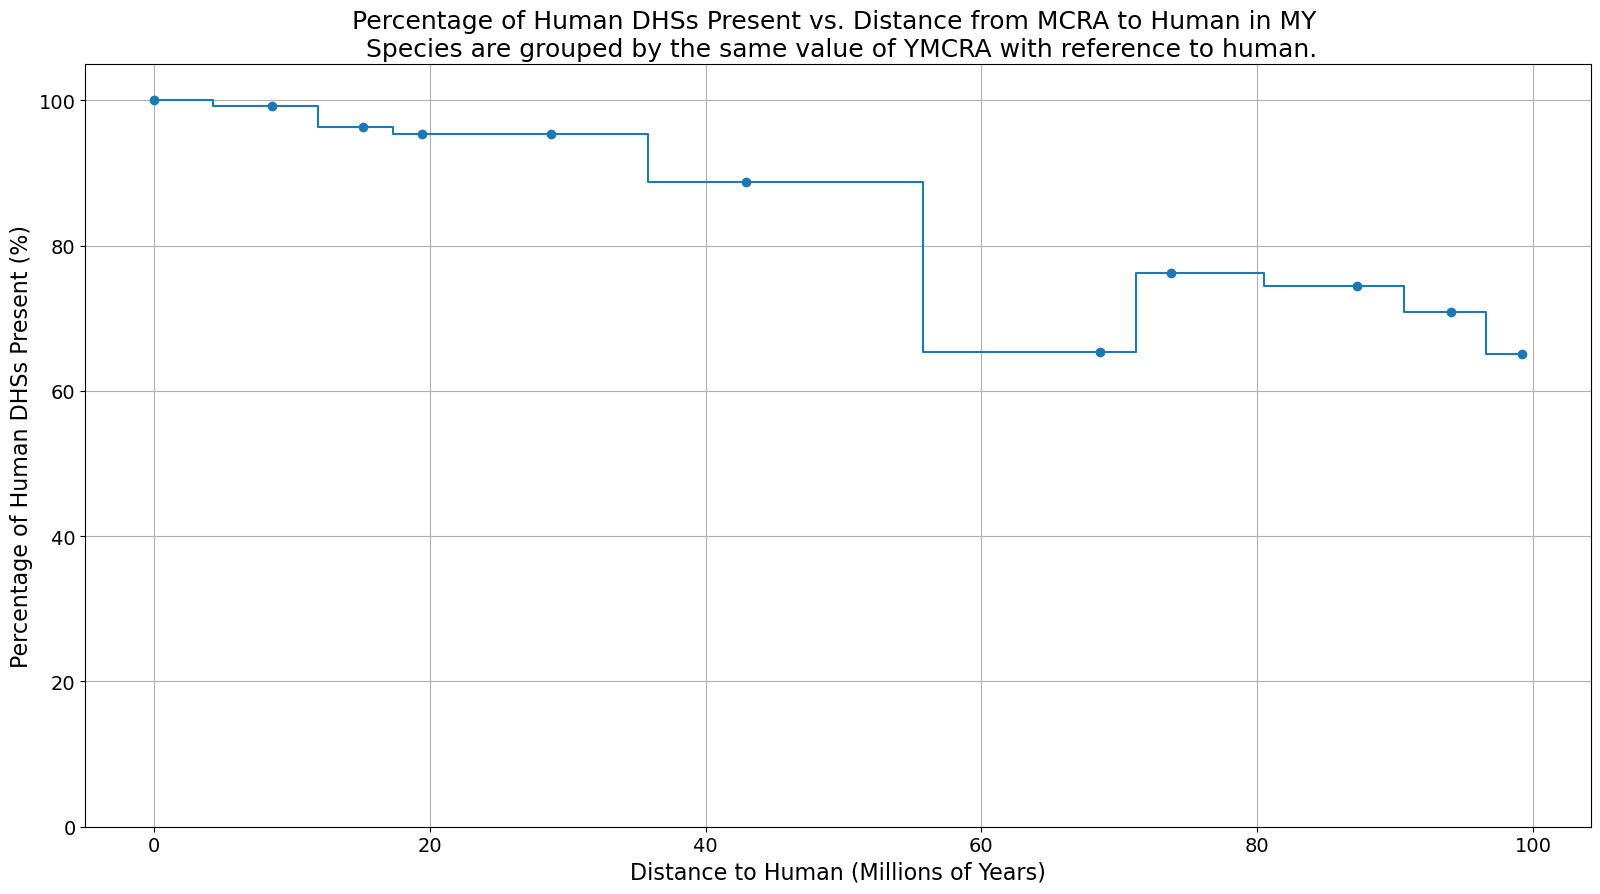

In [216]:
# Convert the dictionary into a DataFrame
grouped_data = pd.DataFrame(list(sums_by_group.items()), columns=['Distance to Human (MY)', 'DHS Counts'])
grouped_data = grouped_data.sort_values(by='Distance to Human (MY)')
grouped_data['DHS Percentage'] = grouped_data['DHS Counts'] / total_human_dhs * 100

# Create the line plot
plt.figure(figsize=(16, 9))
plt.plot(grouped_data['Distance to Human (MY)'], grouped_data['DHS Percentage'], marker='o', linestyle='-', drawstyle='steps-mid')
plt.ylabel("Percentage of Human DHSs Present (%)", fontsize=16)
plt.xlabel("Distance to Human (Millions of Years)", fontsize=16)
plt.title("Percentage of Human DHSs Present vs. Distance from MCRA to Human in MY \n Species are grouped by the same value of YMCRA with reference to human.", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize=14)
plt.ylim(0, 105)
plt.yticks(fontsize=14)
plt.savefig(plots_dir +'Percentage_Human_DHSs_vs_MY_grouped.pdf')
plt.show()

In [224]:
for group_index, (key, indices) in enumerate(specie_groups.items()):
    print(group_index, (key, indices))
    for i in indices:
        print (species_list[i], end=', ')

0 (94.0, [0, 2, 3, 18, 19, 20, 28, 37, 38, 39, 40, 41, 42, 43, 44, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 66, 68, 78, 79, 116, 117, 120, 121, 128, 129, 130, 131, 137, 138, 142, 143, 144, 145, 146, 147, 149, 150, 161, 162, 163, 169, 179, 180, 183, 184, 185, 187, 198, 200, 202, 213, 215, 220, 236, 239, 240, 242, 243, 246, 252, 254, 255, 257, 259, 260, 261, 262, 263, 269, 271, 272, 273, 274, 278, 279, 280, 286, 292, 293, 294, 297, 300, 303, 304, 307, 308, 309, 310, 317, 323, 328, 336, 361, 362, 363, 364, 365, 369, 371, 375, 384, 393, 401, 402, 404, 405, 406, 408, 410, 411, 417, 431, 435, 436, 437, 440, 441, 443, 445])
Acinonyx_jubatus, Ailuropoda_melanoleuca, Ailurus_fulgens, Ammotragus_lervia, Anoura_caudifer, Antilocapra_americana, Artibeus_jamaicensis, Balaenoptera_acutorostrata, Balaenoptera_bonaerensis, Beatragus_hunteri, Bison_bison, Bos_indicus, Bos_mutus, Bos_taurus, Bubalus_bubalis, Camelus_bactrianus, Camelus_dromedarius, Camelus_ferus, CanFam4, Canis_lupus_VD, Canis_lupus_ding

# Reciprocal mapping -- formatting

In [200]:
HUMAN_DHS_INDEX = pd.read_csv("/net/seq/data2/projects/sabramov/SuperIndex/dnase-index0415/matrices/full/output/annotations/masterlist_DHSs_Altius.filtered.annotated.bed", sep='\t')
MOUSE_DHS_INDEX = pd.read_csv("/net/seq/data2/projects/ENCODE4Plus/indexes/index_altius_mouse_24-04-17/output/masterlist.only_autosomes.filtered.bed", sep='\t', header = None)

In [201]:
HUMAN_DHS_INDEX.columns = ['human_chr', 'human_start', 'human_end', 'human_dhs_id'] + list(range(4, 33))
HUMAN_DHS_INDEX.drop(list(range(11, 33)),  axis=1, inplace = True)

new_column_names = {
    MOUSE_DHS_INDEX.columns[0]: 'mouse_chr',
    MOUSE_DHS_INDEX.columns[1]: 'mouse_start',
    MOUSE_DHS_INDEX.columns[2]: 'mouse_end',
    MOUSE_DHS_INDEX.columns[3]: 'mouse_dhs_id'
}
MOUSE_DHS_INDEX.rename(columns=new_column_names, inplace=True)

In [203]:
# Sort HUMAN_DHS_INDEX by 'human_dhs_id' column
HUMAN_DHS_INDEX_sorted = HUMAN_DHS_INDEX.sort_values(by='human_dhs_id')
is_sorted = HUMAN_DHS_INDEX_sorted.iloc[:, 3].is_monotonic_increasing
print("The 4th column in HUMAN_DHS_INDEX_sorted is sorted:", is_sorted)

# Sort MOUSE_DHS_INDEX by 'mouse_dhs_id' column
MOUSE_DHS_INDEX_sorted = MOUSE_DHS_INDEX.sort_values(by='mouse_dhs_id')
is_sorted = MOUSE_DHS_INDEX_sorted.iloc[:, 3].is_monotonic_increasing
print("The 4th column in MOUSE_DHS_INDEX_sorted is sorted:", is_sorted)

The 4th column in HUMAN_DHS_INDEX_sorted is sorted: True
The 4th column in MOUSE_DHS_INDEX_sorted is sorted: True


In [210]:
file_path = "/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/human_to_mouse_nasi_index_april.txt"
human_to_mouse = pd.read_csv(file_path, sep='\t', header = None)
human_to_mouse.columns = [
    'human_chrom', 'human_start', 'human_end', 'mouse_dhs_id', 'score', 
    'strand', 'thickStart', 'thickEnd', 'itemRgb', 
    'blockCount', 'blockSizes', 'blockStarts'
]
human_to_mouse

,human_chrom,human_start,human_end,mouse_dhs_id,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts
0,chr7,92714807,92714920,chunk2206_13_1,1000,+,92714807,92714920,"0,0,0",1,113,0
1,chr7,92698762,92699125,chunk2206_14_1,1000,+,92698762,92699125,"0,0,0",8,"17,97,8,27,95,60,30,3","0,23,122,131,163,261,322,360"
2,chr7,92698563,92698790,chunk2206_18_1,1000,+,92698563,92698790,"0,0,0",4,"134,61,19,5","0,135,197,222"
3,chr7,92698321,92698495,chunk2206_21_1,1000,+,92698321,92698495,"0,0,0",4,"6,110,6,39","0,7,118,135"
4,chr5,42888388,42888461,chunk2206_61_1,1000,+,42888388,42888461,"0,0,0",3,"16,33,22","0,17,51"
...,...,...,...,...,...,...,...,...,...,...,...,...
608821,chr1,68164591,68164655,chunk4256_117_1,1000,+,68164591,68164655,"0,0,0",2,"17,45","0,19"
608822,chr1,68146819,68146853,chunk4256_125_1,1000,+,68146819,68146853,"0,0,0",1,34,0
608823,chr1,68141848,68142053,chunk4256_128_1,1000,+,68141848,68142053,"0,0,0",9,"30,5,39,8,26,23,5,12,31","0,32,38,78,90,118,142,154,174"
608824,chr1,68141418,68141751,chunk4256_130_1,1000,+,68141418,68141751,"0,0,0",10,"87,16,14,5,69,5,31,6,7,70","0,88,105,121,128,198,204,237,251,263"


In [211]:
file_path = "/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/Mus_musculus-to-Homo_sapiens_mapped.txt"
mouse_to_human = pd.read_csv(file_path, sep='\t', header = None)
mouse_to_human.columns = [
    'mouse_chrom', 'mouse_start', 'mouse_end', 'human_dhs_id', 'score', 
    'strand', 'thickStart', 'thickEnd', 'itemRgb', 
    'blockCount', 'blockSizes', 'blockStarts'
]
mouse_to_human

,mouse_chrom,mouse_start,mouse_end,human_dhs_id,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts
0,chr12,31083742,31083780,chunk0948_102_1,1000,+,31083742,31083780,"0,0,0",1,38,0
1,chr12,31083521,31083643,chunk0948_103_1,1000,+,31083521,31083643,"0,0,0",2,"106,15","0,107"
2,chr12,31083001,31083066,chunk0948_104_1,1000,+,31083001,31083066,"0,0,0",2,"35,29","0,36"
3,chr12,31082667,31082781,chunk0948_107_1,1000,+,31082667,31082781,"0,0,0",3,"48,32,17","0,57,97"
4,chr12,31081473,31081621,chunk0948_114_1,1000,+,31081473,31081621,"0,0,0",3,"102,5,27","0,106,121"
...,...,...,...,...,...,...,...,...,...,...,...,...
1344129,chr16,33126285,33126364,chunk1416_4244_1,1000,+,33126285,33126364,"0,0,0",1,79,0
1344130,chr16,33127315,33127422,chunk1416_4247_1,1000,+,33127315,33127422,"0,0,0",4,"24,35,24,1","0,25,69,106"
1344131,chr16,33128077,33128123,chunk1416_4249_1,1000,+,33128077,33128123,"0,0,0",3,"27,12,5","0,28,41"
1344132,chr18,6602773,6602801,chunk1416_4324_1,1000,+,6602773,6602801,"0,0,0",1,28,0


In [212]:
# sanity check 
# some sorting, for better work
human_to_mouse_sorted = human_to_mouse.sort_values(by=human_to_mouse.columns[3])
mouse_to_human_sorted = mouse_to_human.sort_values(by=mouse_to_human.columns[3])

merged_df = pd.merge(mouse_to_human_sorted[[mouse_to_human_sorted.columns[3]]], 
                     HUMAN_DHS_INDEX_sorted[[HUMAN_DHS_INDEX_sorted.columns[3]]], 
                     how='inner', 
                     left_on=mouse_to_human_sorted.columns[3], 
                     right_on=HUMAN_DHS_INDEX_sorted.columns[3])

# Check if the size of the merged result is the same as the mouse_to_human_sorted 4th column unique values
all_present = merged_df.shape[0] == mouse_to_human_sorted[mouse_to_human_sorted.columns[3]].nunique()

print("All values in the 4th column of mouse_to_human_sorted are present in the 4th column of HUMAN_DHS_INDEX_sorted:", all_present)

merged_df = pd.merge(human_to_mouse_sorted[[human_to_mouse_sorted.columns[3]]], 
                     MOUSE_DHS_INDEX_sorted[[MOUSE_DHS_INDEX_sorted.columns[3]]], 
                     how='inner', 
                     left_on=human_to_mouse_sorted.columns[3], 
                     right_on=MOUSE_DHS_INDEX_sorted.columns[3])

# Check if the size of the merged result is the same as the human_to_mouse_sorted 4th column unique values
all_present = merged_df.shape[0] == human_to_mouse_sorted[human_to_mouse_sorted.columns[3]].nunique()

print("All values in the 4th column of human_to_mouse_sorted are present in the 4th column of MOUSE_DHS_INDEX_sorted:", all_present)


All values in the 4th column of mouse_to_human_sorted are present in the 4th column of HUMAN_DHS_INDEX_sorted: True
All values in the 4th column of human_to_mouse_sorted are present in the 4th column of MOUSE_DHS_INDEX_sorted: True


In [213]:
cross_merged_df = pd.merge(human_to_mouse_sorted[[human_to_mouse_sorted.columns[3]]], 
                           HUMAN_DHS_INDEX_sorted[[HUMAN_DHS_INDEX_sorted.columns[3]]], 
                           how='inner', 
                           left_on=human_to_mouse_sorted.columns[3], 
                           right_on=HUMAN_DHS_INDEX_sorted.columns[3])

# Check if the size of the merged result is the same as the unique values in the 4th column of human_to_mouse_sorted
all_present = cross_merged_df.shape[0] == human_to_mouse_sorted[human_to_mouse_sorted.columns[3]].nunique()

print("All values in the 4th column of human_to_mouse_sorted are present in the 4th column of HUMAN_DHS_INDEX_sorted:", all_present)


All values in the 4th column of human_to_mouse_sorted are present in the 4th column of HUMAN_DHS_INDEX_sorted: False


In [214]:
# create raw files, like in makefile
HUMAN_DHS_INDEX_sorted['formatted_name'] = HUMAN_DHS_INDEX_sorted.iloc[:, 0].astype(str) + ':' + HUMAN_DHS_INDEX_sorted.iloc[:, 1].astype(str) + '-' + HUMAN_DHS_INDEX_sorted.iloc[:, 2].astype(str)
id_to_name_map = HUMAN_DHS_INDEX_sorted.set_index(HUMAN_DHS_INDEX_sorted.columns[3])['formatted_name'].to_dict()
mouse_to_human_sorted['mapped_name'] = mouse_to_human_sorted.iloc[:, 3].map(id_to_name_map)
desired_column_order = ['mouse_chrom', 'mouse_start', 'mouse_end', 'mapped_name', 'score',
       'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount',
       'blockSizes', 'blockStarts']
mouse_to_human_sorted_rename = mouse_to_human_sorted[desired_column_order]
new_column_names = {
    mouse_to_human_sorted.columns[3]: 'human_dhs_id_coord',
}
mouse_to_human_sorted_rename.rename(columns=new_column_names, inplace=True)
mouse_to_human_sorted_rename.to_csv('/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/master-peaks.human.mapped-mm9.raw.bed', sep = "\t", index=False, header=False) 

MOUSE_DHS_INDEX_sorted['formatted_name'] = MOUSE_DHS_INDEX_sorted.iloc[:, 0].astype(str) + ':' + MOUSE_DHS_INDEX_sorted.iloc[:, 1].astype(str) + '-' + MOUSE_DHS_INDEX_sorted.iloc[:, 2].astype(str)
id_to_name_map = MOUSE_DHS_INDEX_sorted.set_index(MOUSE_DHS_INDEX_sorted.columns[3])['formatted_name'].to_dict()
human_to_mouse_sorted['mapped_name'] = human_to_mouse_sorted.iloc[:, 3].map(id_to_name_map)
desired_column_order = ['human_chrom', 'human_start', 'human_end', 'mapped_name', 'score',
                        'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount',
                        'blockSizes', 'blockStarts']
human_to_mouse_sorted_renamed = human_to_mouse_sorted[desired_column_order]
new_column_names = {
    human_to_mouse_sorted_renamed.columns[3]: 'mouse_dhs_id_coord',
}
human_to_mouse_sorted_renamed.rename(columns=new_column_names, inplace=True)
human_to_mouse_sorted_renamed.to_csv('/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/master-peaks.mouse.mapped-hg38.raw.bed', sep = "\t", index=False, header=False)

/tmp/ipykernel_27773/606066744.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_to_human_sorted_rename.rename(columns=new_column_names, inplace=True)
/tmp/ipykernel_27773/606066744.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_to_mouse_sorted_renamed.rename(columns=new_column_names, inplace=True)


# Add reciprocal peak data to the plot

In [231]:
# Identify which peaks from index are reciprocal between human and mouse

file_path = '/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/reciprocal-peaks.human.bed'
bed_df = pd.read_csv(file_path, sep='\t', header=None, names=['chr', 'start', 'end', 'id'])

# Create the list of formatted regions
regions = bed_df.apply(lambda row: f"{row['chr']}:{row['start']}-{row['end']}", axis=1).tolist()
#print(regions[:5])  # Print first 5 to check

index['region'] = index.apply(lambda row: f"{row['#chr']}:{row['start']}-{row['end']}", axis=1)
#print(index['region'][:5])  # Print the first few rows to verify


['chr1:962655-963000', 'chr1:964860-965220', 'chr1:966106-966293', 'chr1:966679-966849', 'chr1:966920-967100']
0    chr1:794480-794640
1    chr1:795020-795155
2    chr1:796175-796240
3    chr1:802368-802529
4    chr1:804885-805000
Name: region, dtype: object


In [249]:
total_number_of_reciprocal_peaks = bed_df.shape[0]

In [241]:
# Check each region in 'index' DataFrame against the region set
region_set = set(regions)
index['is_reciprocal'] = index['region'].apply(lambda x: x in region_set)

In [242]:
reciprocal_list = index['is_reciprocal'].to_list()

# Write the list to a file
with open(save_dir + 'reciprocal_list_05_01.txt', 'w') as file:
    for item in reciprocal_list:
        file.write(str(item) + '\n')

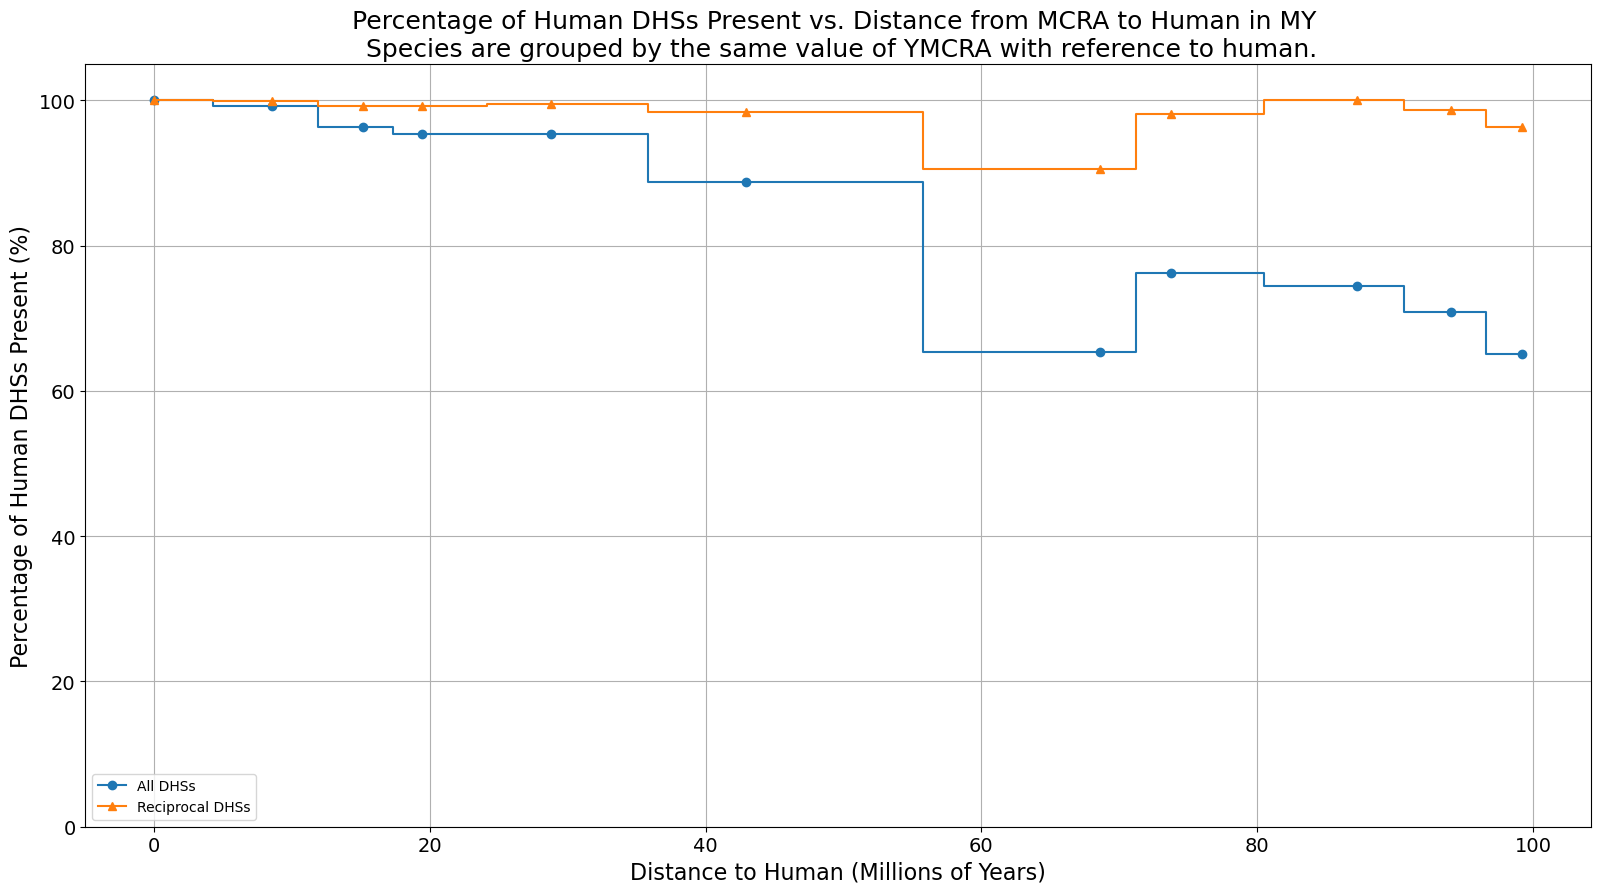

In [255]:
# Filter the data matrix to include only rows where 'is_reciprocal' is True
filtered_data = data[index['is_reciprocal'].values]

# Re-create the aggregated_data matrix using the filtered data
filtered_aggregated_data = np.zeros((filtered_data.shape[0], len(specie_groups)))

# For each group, calculate the maximum across the columns for each row in the filtered data
for group_index, (key, indices) in enumerate(specie_groups.items()):
    filtered_aggregated_data[:, group_index] = filtered_data[:, indices].max(axis=1)

# Calculate the sum of each column in the filtered_aggregated_data matrix
filtered_column_sums = filtered_aggregated_data.sum(axis=0)

# Create a dictionary for the new sums
filtered_sums_by_group = {}
for group_index, (key, indices) in enumerate(specie_groups.items()):
    filtered_sums_by_group[key] = filtered_column_sums[group_index]
filtered_sums_by_group[0] = total_number_of_reciprocal_peaks

# Convert the dictionary into a DataFrame
filtered_grouped_data = pd.DataFrame(list(filtered_sums_by_group.items()), columns=['Distance to Human (MY)', 'DHS Counts'])
filtered_grouped_data = filtered_grouped_data.sort_values(by='Distance to Human (MY)')
filtered_grouped_data['DHS Percentage'] = filtered_grouped_data['DHS Counts'] / total_number_of_reciprocal_peaks * 100

# Plot both original and filtered data
plt.figure(figsize=(16, 9))
plt.plot(grouped_data['Distance to Human (MY)'], grouped_data['DHS Percentage'], marker='o', linestyle='-', drawstyle='steps-mid', label='All DHSs')
plt.plot(filtered_grouped_data['Distance to Human (MY)'], filtered_grouped_data['DHS Percentage'], marker='^', linestyle='-', drawstyle='steps-mid', label='Reciprocal DHSs')
plt.ylabel("Percentage of Human DHSs Present (%)", fontsize=16)
plt.xlabel("Distance to Human (Millions of Years)", fontsize=16)
plt.title("Percentage of Human DHSs Present vs. Distance from MCRA to Human in MY \n Species are grouped by the same value of YMCRA with reference to human.", fontsize=18)
plt.ylim(0, 105)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(plots_dir +'Percentage_Human_DHSs_vs_MY_grouped_with_reciprocal.pdf')
plt.show()



## Some other reciprocal peaks checks

In [259]:
# How many human DHS are mapped on mouse?

# we can get it by
# !cat /net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_bnmapper_april_index/Homo_sapiens-to-Mus_musculus_swapped_mapped.txt| wc -l

index["Mus_musculus"].sum()

1344134

In [263]:
# How many mouse DHS are mapped on human?

!cat /net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/human_to_mouse_nasi_index_april.txt | wc -l

608826


In [300]:
# How many mouse DHS which are mapped on human, intersect with human DHS list?

file_path = '/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/intersection.txt'
mouse_dhs_mapped_on_human = pd.read_csv(file_path, sep="\t", header=None)

print(f"Number of '1's in the last column: {mouse_dhs_mapped_on_human[12].sum()}")


Number of '1's in the last column: 469145


In [302]:
new_column_names = {
    mouse_dhs_mapped_on_human.columns[0]: 'human_chr',
    mouse_dhs_mapped_on_human.columns[1]: 'human_start',
    mouse_dhs_mapped_on_human.columns[2]: 'human_end',
    mouse_dhs_mapped_on_human.columns[3]: 'mouse_dhs_id',
    mouse_dhs_mapped_on_human.columns[12]: 'intersected_or_not_with_human_dhs',
    mouse_dhs_mapped_on_human.columns[13]: 'intersected_human_dhs'
}
mouse_dhs_mapped_on_human.rename(columns=new_column_names, inplace=True)

mouse_dhs_mapped_on_human

,human_chr,human_start,human_end,mouse_dhs_id,4,5,6,7,8,9,10,11,intersected_or_not_with_human_dhs,intersected_human_dhs
0,KI270728.1,1194559,1194673,chunk1146_790_2,1000,+,1194559,1194673,"0,0,0",2,"24,21","0,93",0,NaN
1,KI270752.1,8529,8572,chunk1523_489_3,1000,+,8529,8572,"0,0,0",1,43,0,0,NaN
2,chr1,933615,933712,chunk4662_1122_1,1000,+,933615,933712,"0,0,0",6,"10,15,6,21,12,26","0,11,27,34,58,71",1,chunk0006_686_1;chunk0006_688_1
3,chr1,935089,935166,chunk4662_1120_1,1000,+,935089,935166,"0,0,0",3,"23,29,11","0,24,66",1,chunk0006_691_1;chunk0006_692_1
4,chr1,935555,935877,chunk4662_1117_1,1000,+,935555,935877,"0,0,0",2,"19,112","0,210",1,chunk0006_693_1;chunk0006_695_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608821,chrY,19576366,19576400,chunk6179_1946_1,1000,+,19576366,19576400,"0,0,0",1,34,0,0,NaN
608822,chrY,19773688,19773745,chunk5629_175_1,1000,+,19773688,19773745,"0,0,0",2,"32,24","0,33",0,NaN
608823,chrY,20957034,20957066,chunk1525_321_1,1000,+,20957034,20957066,"0,0,0",1,32,0,0,NaN
608824,chrY,26576592,26576629,chunk5807_104_1,1000,+,26576592,26576629,"0,0,0",1,37,0,0,NaN


In [316]:
mapped_on_more_than_one_dhs = 0
for entry in mouse_dhs_mapped_on_human["intersected_human_dhs"].to_list():
    if ";" in str(entry):
        mapped_on_more_than_one_dhs += 1
print(mapped_on_more_than_one_dhs)

mapped_on_exactly_one_dhs = 0
for entry in mouse_dhs_mapped_on_human["intersected_human_dhs"].to_list():
    if ";" not in str(entry) and str(entry) != "nan":
        mapped_on_exactly_one_dhs += 1
print(mapped_on_exactly_one_dhs)

print("Sanity check ", mapped_on_more_than_one_dhs+mapped_on_exactly_one_dhs , " = ", mouse_dhs_mapped_on_human["intersected_or_not_with_human_dhs"].sum())

199670
269475
Sanity check  469145  =  469145


In [319]:
# How many human DHS which are mapped on mouse, intersect with mouse DHS list?

file_path = '/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/intersection_2.txt'
human_dhs_mapped_on_mouse = pd.read_csv(file_path, sep="\t", header=None)

print(f"Number of '1's in the last column: {human_dhs_mapped_on_mouse[12].sum()}")

/tmp/ipykernel_27773/3270853242.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  human_dhs_mapped_on_mouse = pd.read_csv(file_path, sep="\t", header=None)


Number of '1's in the last column: 593567


In [320]:
new_column_names = {
    human_dhs_mapped_on_mouse.columns[0]: 'mouse_chr',
    human_dhs_mapped_on_mouse.columns[1]: 'mouse_start',
    human_dhs_mapped_on_mouse.columns[2]: 'mouse_end',
    human_dhs_mapped_on_mouse.columns[3]: 'human_dhs_id',
    human_dhs_mapped_on_mouse.columns[12]: 'intersected_or_not_with_mouse_dhs',
    human_dhs_mapped_on_mouse.columns[13]: 'intersected_mouse_dhs'
}
human_dhs_mapped_on_mouse.rename(columns=new_column_names, inplace=True)

human_dhs_mapped_on_mouse

,mouse_chr,mouse_start,mouse_end,human_dhs_id,4,5,6,7,8,9,10,11,intersected_or_not_with_mouse_dhs,intersected_mouse_dhs
0,GL455991.1,151420,151535,chunk0077_401_1,1000,+,151420,151535,"0,0,0",1,115,0,0,NaN
1,GL455991.1,162064,162134,chunk0077_345_1,1000,+,162064,162134,"0,0,0",2,"26,13","0,57",0,NaN
2,GL455991.1,163361,163518,chunk0150_1247_1,1000,+,163361,163518,"0,0,0",2,"74,46","0,111",0,NaN
3,GL455991.1,167539,167589,chunk0077_292_1,1000,+,167539,167589,"0,0,0",1,50,0,0,NaN
4,GL455991.1,170223,170247,chunk0150_1341_1,1000,+,170223,170247,"0,0,0",1,24,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344129,chrY,1964874,1964953,chunk0498_1871_1,1000,+,1964874,1964953,"0,0,0",2,"21,23","0,56",0,NaN
1344130,chrY,2189122,2189253,chunk2168_6803_1,1000,+,2189122,2189253,"0,0,0",4,"28,60,5,18","0,39,100,113",0,NaN
1344131,chrY,2190411,2190435,chunk2168_6801_1,1000,+,2190411,2190435,"0,0,0",1,24,0,0,NaN
1344132,chrY,2190712,2190778,chunk2168_6799_1,1000,+,2190712,2190778,"0,0,0",2,"58,7","0,59",0,NaN


In [315]:
mapped_on_more_than_one_dhs = 0
for entry in human_dhs_mapped_on_mouse["intersected_mouse_dhs"].to_list():
    if ";" in str(entry):
        mapped_on_more_than_one_dhs += 1
print(mapped_on_more_than_one_dhs)

mapped_on_exactly_one_dhs = 0
for entry in human_dhs_mapped_on_mouse["intersected_mouse_dhs"].to_list():
    if ";" not in str(entry) and str(entry) != "nan":
        mapped_on_exactly_one_dhs += 1
print(mapped_on_exactly_one_dhs)

print("Sanity check ", mapped_on_more_than_one_dhs+mapped_on_exactly_one_dhs , " = ", human_dhs_mapped_on_mouse["intersected_or_not_with_mouse_dhs"].sum())

154206
439361
Sanity check  593567  =  593567


In [322]:
# Again, do reciprocal mapping, but here
mouse_dhs_with_one_intersection_set = set()
human_dhs_with_one_intersection_set = set()

for entry in mouse_dhs_mapped_on_human["intersected_human_dhs"].to_list():
    if ";" not in str(entry) and str(entry) != "nan":
        # these entries are mouse dhs which mappings on human are intersected only with one human dhs
        mouse_dhs_with_one_intersection_set.add(entry)

for entry in human_dhs_mapped_on_mouse["intersected_mouse_dhs"].to_list():
    if ";" not in str(entry) and str(entry) != "nan":
         # these entries are human dhs which mappings on mouse are intersected only with one mouse dhs
        human_dhs_with_one_intersection_set.add(entry)
        
# here, as I understand, for every entry in set1 Ann just checked if it is present in set2, but I think we need to check carefully if this dhs is mapped on the same spot back
# I can redo Ann analysis here, just to check...

In [324]:
# Filter mouse DHS mapped on human
mouse_dhs_with_one_intersection = mouse_dhs_mapped_on_human[
    mouse_dhs_mapped_on_human["intersected_human_dhs"].apply(lambda x: ";" not in str(x) and str(x) != "nan")
]

# Filter human DHS mapped on mouse
human_dhs_with_one_intersection = human_dhs_mapped_on_mouse[
    human_dhs_mapped_on_mouse["intersected_mouse_dhs"].apply(lambda x: ";" not in str(x) and str(x) != "nan")
]

mouse_dhs_with_one_intersection

,human_chr,human_start,human_end,mouse_dhs_id,4,5,6,7,8,9,10,11,intersected_or_not_with_human_dhs,intersected_human_dhs
5,chr1,939021,939082,chunk4662_1108_1,1000,+,939021,939082,"0,0,0",3,"13,34,10","0,14,51",1,chunk0006_722_1
7,chr1,940082,940238,chunk4662_1101_1,1000,+,940082,940238,"0,0,0",4,"13,11,104,8","0,14,29,148",1,chunk0006_734_1
12,chr1,962701,962922,chunk4662_1033_1,1000,+,962701,962922,"0,0,0",1,221,0,1,chunk0006_865_1
14,chr1,965034,965183,chunk4662_1022_1,1000,+,965034,965183,"0,0,0",1,149,0,1,chunk0006_885_1
15,chr1,966163,966213,chunk4662_1018_2,1000,+,966163,966213,"0,0,0",2,"16,24","0,26",1,chunk0006_894_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608812,chrY,11065698,11065783,chunk5740_244_1,1000,+,11065698,11065783,"0,0,0",2,"28,24","0,61",1,chunk2388_352_1
608814,chrY,11813692,11813938,chunk0516_78_1,1000,+,11813692,11813938,"0,0,0",4,"1,64,116,7","0,3,68,239",1,chunk2392_20_1
608815,chrY,13095186,13095277,chunk4626_197_1,1000,+,13095186,13095277,"0,0,0",3,"26,9,19","0,43,72",1,chunk2392_1298_1
608818,chrY,18992838,18992872,chunk0670_1755_4,1000,+,18992838,18992872,"0,0,0",1,34,0,1,chunk2405_151_1


In [337]:
blue_set = set(human_dhs_with_one_intersection["human_dhs_id"])
matches = mouse_dhs_with_one_intersection["intersected_human_dhs"].apply(lambda x: x in blue_set)

number_of_enries_having_a_match_in_blue_list = matches.sum()
number_of_enries_doesnt_having_a_match_in_blue_list = len(matches) - number_of_enries_having_a_match_in_blue_list

print(number_of_enries_having_a_match_in_blue_list, number_of_enries_doesnt_having_a_match_in_blue_list)


124360 145115


In [343]:
green_set = set(mouse_dhs_with_one_intersection["mouse_dhs_id"])
matches = human_dhs_with_one_intersection["intersected_mouse_dhs"].apply(lambda x: x in green_set)

number_of_enries_having_a_match_in_green_list = matches.sum()
number_of_enries_doesnt_having_a_match_in_green_list = len(matches) - number_of_enries_having_a_match_in_green_list

print(number_of_enries_having_a_match_in_green_list, number_of_enries_doesnt_having_a_match_in_green_list)


125071 314290


## Implementation of the new approach of reciprocal mapping

In [ ]:
#  A -> B, C
#  B -> A, E
#  C -> A, D
# means A <--> B, C

In [350]:
# Filter mouse DHS mapped on human DHS
mouse_dhs_with_any_intersections = mouse_dhs_mapped_on_human[
    mouse_dhs_mapped_on_human["intersected_human_dhs"].apply(lambda x: str(x) != "nan")
]

# Filter human DHS mapped on mouse DHS
human_dhs_with_any_intersections = human_dhs_mapped_on_mouse[
    human_dhs_mapped_on_mouse["intersected_mouse_dhs"].apply(lambda x: str(x) != "nan")
]

print(mouse_dhs_with_any_intersections.shape, human_dhs_with_any_intersections.shape)

(469145, 14) (593567, 14)


In [351]:
human_dhs_with_any_intersections

,mouse_chr,mouse_start,mouse_end,human_dhs_id,4,5,6,7,8,9,10,11,intersected_or_not_with_mouse_dhs,intersected_mouse_dhs
524,chr1,3095268,3095394,chunk1978_1292_1,1000,+,3095268,3095394,"0,0,0",2,"81,36","0,90",1,chunk0001_31_1;chunk0001_33_1
527,chr1,3113303,3113416,chunk1978_1275_2,1000,+,3113303,3113416,"0,0,0",2,"80,31","0,82",1,chunk0001_39_1
530,chr1,3119855,3120014,chunk1978_1253_1,1000,+,3119855,3120014,"0,0,0",2,"8,148","0,11",1,chunk0001_50_1
531,chr1,3119862,3120178,chunk1978_1252_1,1000,+,3119862,3120178,"0,0,0",2,"1,312","0,4",1,chunk0001_50_1
542,chr1,3165911,3166071,chunk1978_1210_1,1000,+,3165911,3166071,"0,0,0",3,"11,47,49","0,63,111",1,chunk0001_74_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303829,chr9,124121649,124121863,chunk1318_944_2,1000,+,124121649,124121863,"0,0,0",2,"23,186","0,28",1,chunk6382_111_2
1303832,chr9,124123969,124124031,chunk1318_954_1,1000,+,124123969,124124031,"0,0,0",2,"32,27","0,35",1,chunk6382_117_1
1303840,chr9,124126512,124126591,chunk1318_982_1,1000,+,124126512,124126591,"0,0,0",2,"26,51","0,28",1,chunk6382_123_2
1303841,chr9,124127522,124128157,chunk1318_988_1,1000,+,124127522,124128157,"0,0,0",2,"35,27","0,608",1,chunk6382_126_1;chunk6382_125_1


In [353]:
# Split the values in the "intersected_mouse_dhs" column by ";" and store them in a new column
human_dhs_with_any_intersections['intersected_mouse_dhs_list'] = human_dhs_with_any_intersections['intersected_mouse_dhs'].apply(lambda x: x.split(";"))

# Create a dictionary from the DataFrame where keys are values from the "human_dhs_id" column
# and values are lists from the "intersected_mouse_dhs_list" column
human_dhs_dict = dict(zip(human_dhs_with_any_intersections['human_dhs_id'], human_dhs_with_any_intersections['intersected_mouse_dhs_list']))

# same for mouse:
mouse_dhs_with_any_intersections['intersected_human_dhs_list'] = mouse_dhs_with_any_intersections['intersected_human_dhs'].apply(lambda x: x.split(";"))
mouse_dhs_dict = dict(zip(mouse_dhs_with_any_intersections['mouse_dhs_id'], mouse_dhs_with_any_intersections['intersected_human_dhs_list']))


human_dhs_dict # keys -- human_dhs_id, values -- list of mouse dhs

/tmp/ipykernel_27773/1707265239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_dhs_with_any_intersections['intersected_mouse_dhs_list'] = human_dhs_with_any_intersections['intersected_mouse_dhs'].apply(lambda x: x.split(";"))
/tmp/ipykernel_27773/1707265239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_dhs_with_any_intersections['intersected_human_dhs_list'] = mouse_dhs_with_any_intersections['intersected_human_dhs'].apply(lambda x: x.split(";"))


{'chunk1978_1292_1': ['chunk0001_31_1', 'chunk0001_33_1'],
 'chunk1978_1275_2': ['chunk0001_39_1'],
 'chunk1978_1253_1': ['chunk0001_50_1'],
 'chunk1978_1252_1': ['chunk0001_50_1'],
 'chunk1978_1210_1': ['chunk0001_74_1'],
 'chunk1978_1144_2': ['chunk0001_91_1'],
 'chunk1978_1139_1': ['chunk0001_93_1'],
 'chunk1978_1119_1': ['chunk0001_94_1'],
 'chunk1978_1100_1': ['chunk0001_100_1'],
 'chunk1978_1098_1': ['chunk0001_101_1'],
 'chunk1978_1014_1': ['chunk0002_7_1'],
 'chunk1978_951_1': ['chunk0002_17_1'],
 'chunk1978_839_1': ['chunk0002_47_1'],
 'chunk1978_837_1': ['chunk0002_47_1'],
 'chunk1978_835_1': ['chunk0002_47_1', 'chunk0002_48_1'],
 'chunk1978_810_2': ['chunk0002_54_1'],
 'chunk1978_810_1': ['chunk0002_54_1'],
 'chunk1978_808_1': ['chunk0002_54_1'],
 'chunk1978_725_1': ['chunk0002_68_1', 'chunk0002_68_3'],
 'chunk1978_714_1': ['chunk0002_74_1'],
 'chunk1978_713_2': ['chunk0002_74_1'],
 'chunk1978_582_1': ['chunk0002_104_1'],
 'chunk1978_568_2': ['chunk0002_108_1', 'chunk0002_10

In [355]:
reciprocal_count = 0
reciprocal_entries = []

# Iterate over each key in human_dhs_dict
for human_key, human_values in human_dhs_dict.items():
    # Iterate over each value in the list of values for the current key
    for human_value in human_values:
        # Check if the value exists as a key in mouse_dhs_dict
        if human_value in mouse_dhs_dict:
            # Check if the original human_key exists in the list of values for the mouse_key
            if human_key in mouse_dhs_dict[human_value]:
                # Increment the reciprocal count
                reciprocal_count += 1
                # Store the reciprocal entry
                reciprocal_entries.append((human_key, human_value))  # keys -- human_dhs_id, values -- mouse dhs

print("Number of reciprocal entries:", reciprocal_count)


Number of reciprocal entries: 476334


In [356]:
# Let's do the same thing, but alter human and mouse lists:

reciprocal_count = 0

for mouse_key, mouse_values in mouse_dhs_dict.items():
    for mouse_value in mouse_values:
        if mouse_value in human_dhs_dict:
            if mouse_key in human_dhs_dict[mouse_value]:
                reciprocal_count += 1

print("Number of reciprocal entries:", reciprocal_count)



Number of reciprocal entries: 476334


### Yeaaay!!!

In [363]:
# Let's save it
save_reciprocal = "/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/new_approach_05_07/"

with open(save_reciprocal + 'mouse_dhs_dict.json', 'w') as json_file:
    json.dump(mouse_dhs_dict, json_file)
with open(save_reciprocal + 'human_dhs_dict.json', 'w') as json_file:
    json.dump(human_dhs_dict, json_file)
with open(save_reciprocal + "reciprocal_entries.json", 'w') as jsonfile:
    json.dump(reciprocal_entries, jsonfile)

In [362]:
reciprocal_entries # (human_dhs_id, mouse_dhs_id)

[('chunk1978_1292_1', 'chunk0001_31_1'),
 ('chunk1978_1253_1', 'chunk0001_50_1'),
 ('chunk1978_1252_1', 'chunk0001_50_1'),
 ('chunk1978_1144_2', 'chunk0001_91_1'),
 ('chunk1978_1119_1', 'chunk0001_94_1'),
 ('chunk1978_1100_1', 'chunk0001_100_1'),
 ('chunk1978_951_1', 'chunk0002_17_1'),
 ('chunk1978_835_1', 'chunk0002_48_1'),
 ('chunk1978_810_2', 'chunk0002_54_1'),
 ('chunk1978_810_1', 'chunk0002_54_1'),
 ('chunk1978_808_1', 'chunk0002_54_1'),
 ('chunk1978_725_1', 'chunk0002_68_1'),
 ('chunk1978_725_1', 'chunk0002_68_3'),
 ('chunk1978_714_1', 'chunk0002_74_1'),
 ('chunk1978_713_2', 'chunk0002_74_1'),
 ('chunk1978_582_1', 'chunk0002_104_1'),
 ('chunk1978_568_2', 'chunk0002_109_1'),
 ('chunk1978_561_1', 'chunk0002_110_1'),
 ('chunk1978_555_1', 'chunk0002_115_1'),
 ('chunk1978_554_1', 'chunk0002_118_1'),
 ('chunk1978_551_1', 'chunk0002_118_1'),
 ('chunk1978_489_1', 'chunk0002_131_1'),
 ('chunk1978_485_1', 'chunk0002_133_1'),
 ('chunk1978_485_1', 'chunk0002_135_1'),
 ('chunk1978_411_1', 'ch

In [366]:
# Let's also save bed files..

human_keys_list = [entry[0] for entry in reciprocal_entries]
filtered_human_dhs_df = human_dhs_with_any_intersections[human_dhs_with_any_intersections['human_dhs_id'].isin(human_keys_list)]
filtered_human_dhs_df.to_csv(save_reciprocal + "reciprocal-peaks.human.bed", sep='\t', index=False, header=False)

mouse_keys_list = [entry[1] for entry in reciprocal_entries]
filtered_mouse_dhs_df = mouse_dhs_with_any_intersections[mouse_dhs_with_any_intersections['mouse_dhs_id'].isin(mouse_keys_list)]
filtered_mouse_dhs_df.to_csv(save_reciprocal + "reciprocal-peaks.mouse.bed", sep='\t', index=False, header=False)

## How much do the new reciprocal peaks intersect with the old ones from "Mouse Regulatory..."?

In [375]:
file_path = "/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/intersection_between_old_and_new/intersect_hg19_hg38.txt"
old_peaks_human_mapped_on_new = pd.read_csv(file_path, sep="\t", header=None)

print(f"Number of old reciprocal peaks (in hg19) wich have intersection with new reciprocal peaks (in hg38): {old_peaks_human_mapped_on_new[12].sum()}")

Number of old reciprocal peaks (in hg19) wich have intersection with new reciprocal peaks (in hg38): 18761


In [400]:
file_path = "/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/intersection_between_old_and_new/intersect_hg19_hg38_masterlist.txt"
old_peaks_human_mapped_on_new_masterlist = pd.read_csv(file_path, sep="\t", header=None)

print(f"Number of old reciprocal peaks (in hg19) wich have intersection with new index (in hg38): {old_peaks_human_mapped_on_new_masterlist[12].sum()}")

Number of old reciprocal peaks (in hg19) wich have intersection with new index (in hg38): 489852


In [377]:
file_path = "/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/intersection_between_old_and_new/intersect_mm9_mm10.txt"
old_peaks_mouse_mapped_on_new = pd.read_csv(file_path, sep="\t", header=None)

print(f"Number of old reciprocal peaks (in mm9) wich have intersection with new reciprocal peaks (in mm10): {old_peaks_mouse_mapped_on_new[12].sum()}")

Number of old reciprocal peaks (in mm9) wich have intersection with new reciprocal peaks (in mm10): 17113


/tmp/ipykernel_27773/267843537.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  old_peaks_mouse_mapped_on_new = pd.read_csv(file_path, sep="\t", header=None)


In [378]:
file_path = "/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/intersection_between_old_and_new/intersect_mm9_mm10_masterlist.txt"
old_peaks_mouse_mapped_on_new_masterlist = pd.read_csv(file_path, sep="\t", header=None)

print(f"Number of old reciprocal peaks (in mm9) wich have intersection with new index (in mm10): {old_peaks_mouse_mapped_on_new_masterlist[12].sum()}")

Number of old reciprocal peaks (in mm9) wich have intersection with new index (in mm10): 412642


/tmp/ipykernel_27773/808547968.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  old_peaks_mouse_mapped_on_new_masterlist = pd.read_csv(file_path, sep="\t", header=None)


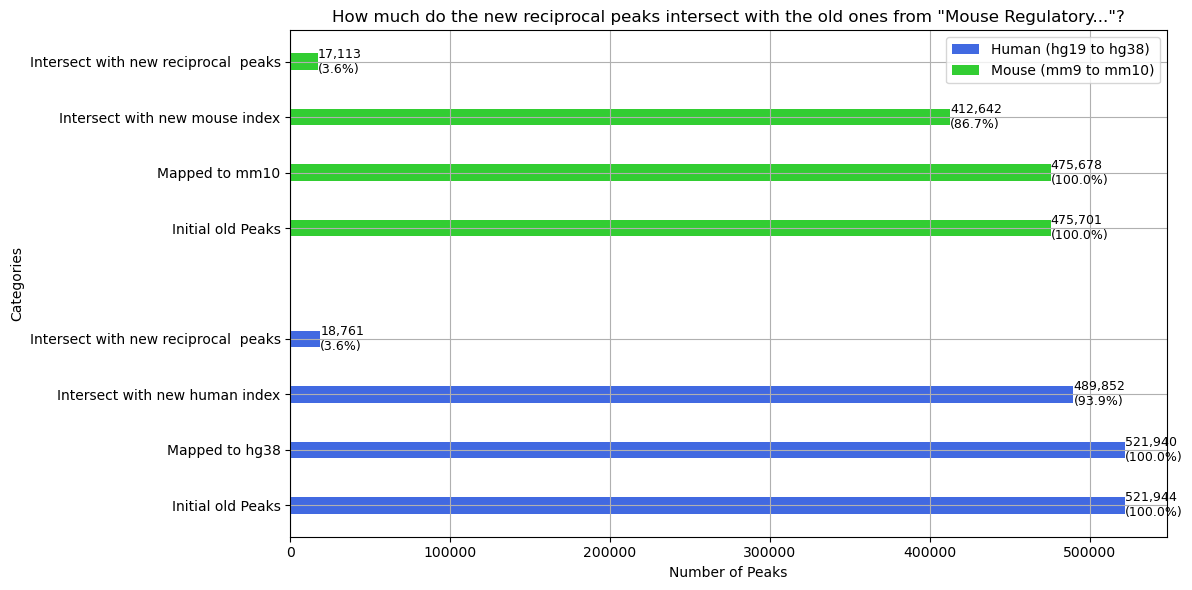

In [383]:
categories = ['Initial Peaks', 'Mapped to hg38', 'Intersect with New Index', 'Intersect with New Peaks']
human_data = [521944, 521940, 489852, 18761]
mouse_data = [475701, 475678, 412642, 17113]

# Function to calculate percentages
def calculate_percentages(data):
    base = data[0]
    return [x / base * 100 for x in data]

# Calculating percentages
human_percentages = calculate_percentages(human_data)
mouse_percentages = calculate_percentages(mouse_data)

# Position setup
human_pos = list(range(len(categories)))
mouse_pos = [x + len(categories) + 1 for x in range(len(categories))]

# Colors and bar width
human_color = 'royalblue'
mouse_color = 'limegreen'
tight_bar_width = 0.3

# Creating the horizontal plot
fig, ax = plt.subplots(figsize=(12, 6))
human_bars = ax.barh(human_pos, human_data, tight_bar_width, label='Human (hg19 to hg38)', color=human_color)
mouse_bars = ax.barh(mouse_pos, mouse_data, tight_bar_width, label='Mouse (mm9 to mm10)', color=mouse_color)

# Setting labels and titles
ax.set_ylabel('Categories')
ax.set_xlabel('Number of Peaks')
ax.set_title('How much do the new reciprocal peaks intersect with the old ones from "Mouse Regulatory..."?')
all_positions = human_pos + mouse_pos
labels = [
    "Initial old Peaks",
    "Mapped to hg38",
    "Intersect with new human index",
    "Intersect with new reciprocal  peaks",
    "Initial old Peaks",
    "Mapped to mm10",
    "Intersect with new mouse index",
    "Intersect with new reciprocal  peaks"
]  
ax.set_yticks(all_positions)
ax.set_yticklabels(labels)

# Adding percentage labels
for bars, percentages in zip((human_bars, mouse_bars), (human_percentages, mouse_percentages)):
    for bar, percentage in zip(bars, percentages):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}\n({percentage:.1f}%)',
                ha='left', va='center', fontsize=9)

ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


In [385]:
file_path = "/net/seq/data2/projects/aabisheva/DHS_evolution/benchmark/hg38/cactus447way_reciprocal_mapping/intersection_between_old_and_new/intersect_hg19_hg38_old_algoritm.txt"
old_peaks_human_mapped_on_new = pd.read_csv(file_path, sep="\t", header=None)

print(f"Number of old reciprocal peaks (in hg19) wich have intersection with new reciprocal peaks (in hg38) - another algoritm: {old_peaks_human_mapped_on_new[4].sum()}")

Number of old reciprocal peaks (in hg19) wich have intersection with new reciprocal peaks (in hg38) - another algoritm: 5099


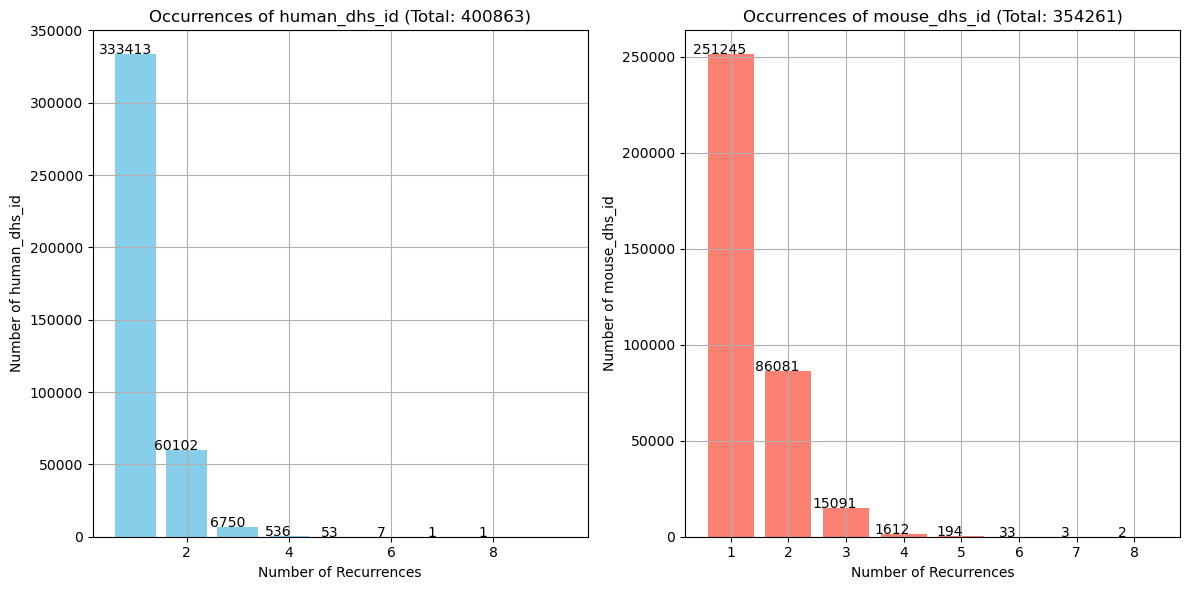

Total number of unique Human DHS IDs: 400863
Total number of unique Mouse DHS IDs: 354261


In [392]:
# Count occurrences of human_dhs_id and mouse_dhs_id
human_dhs_count = Counter(entry[0] for entry in reciprocal_entries)
mouse_dhs_count = Counter(entry[1] for entry in reciprocal_entries)

# Count the total number of unique human_dhs_id and mouse_dhs_id
total_human = len(human_dhs_count)
total_mouse = len(mouse_dhs_count)

# Count how many human_dhs_id are present in more than 1 entry
human_dhs_multiple_counts = Counter(human_dhs_count.values())
# Count how many mouse_dhs_id are present in more than 1 entry
mouse_dhs_multiple_counts = Counter(mouse_dhs_count.values())

# Plot the results for human_dhs_id
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(human_dhs_multiple_counts.keys(), human_dhs_multiple_counts.values(), color='skyblue')
plt.xlabel('Number of Recurrences')
plt.ylabel('Number of human_dhs_id')
plt.title('Occurrences of human_dhs_id (Total: {})'.format(total_human))
plt.grid(True)

# Add total number on the plot for human_dhs_id
for i, count in enumerate(human_dhs_multiple_counts.values()):
    plt.text(i + 0.8, count + 0.5, str(count), ha='center')

# Plot the results for mouse_dhs_id
plt.subplot(1, 2, 2)
plt.bar(mouse_dhs_multiple_counts.keys(), mouse_dhs_multiple_counts.values(), color='salmon')
plt.xlabel('Number of Recurrences')
plt.ylabel('Number of mouse_dhs_id')
plt.title('Occurrences of mouse_dhs_id (Total: {})'.format(total_mouse))
plt.grid(True)

# Add total number on the plot for mouse_dhs_id
for i, count in enumerate(mouse_dhs_multiple_counts.values()):
    plt.text(i + 0.8, count + 0.5, str(count), ha='center')

plt.tight_layout()
plt.show()

# Print the total count of unique human_dhs_id and mouse_dhs_id
print("Total number of unique Human DHS IDs:", total_human)
print("Total number of unique Mouse DHS IDs:", total_mouse)